In [2]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import imshow
from sklearn import mixture
from sklearn import datasets
#from sklearn.datasets import make_classification
#from sklearn.neighbors.kde import KernelDensity



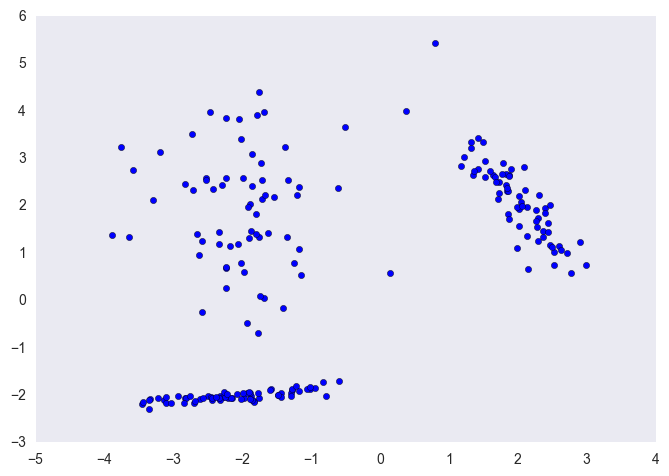

In [4]:
D, _ = datasets.make_classification(
n_samples=200,
n_features=2,
n_informative=2,
n_redundant=0,
n_classes=3,
n_clusters_per_class=1,
class_sep=2 )

#Data points generated by sklearn.datasets.make_classification
fig, ax = plt.subplots()
ax.scatter(D[:,0],D[:,1])
ax.grid(False)
plt.show()

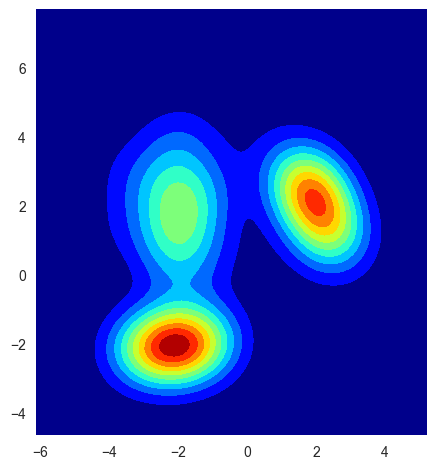

In [5]:
#Density heatmap with KDE
ax = sns.kdeplot(D, shade = True, cmap = "jet")
ax.set( aspect="equal")

ax.patch.set_facecolor('darkblue')
ax.collections[0].set_alpha(0)
ax.grid(False)
plt.show()

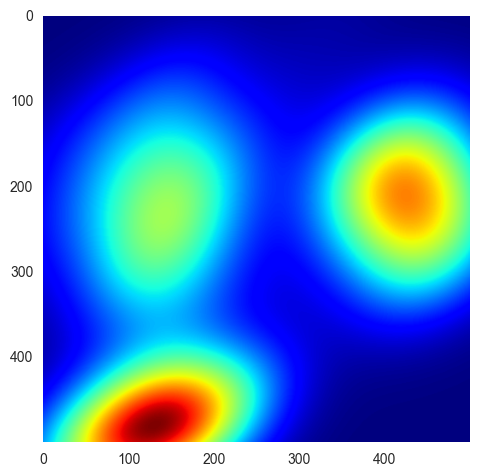

In [9]:
#Density estimation using KDE and heatmap(again)

kde = stats.kde.gaussian_kde(D.T)
x = np.r_[D[:,0].min():D[:,0].max():500j]
y = np.r_[D[:,1].min():D[:,1].max():500j]
x,y = np.meshgrid(x,y)
XX = np.c_[x.ravel(), y.ravel()]
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
z = kde(XX.T)
z = z.reshape(500,500)
z = np.flipud(z)
imshow(z,aspect="equal", cmap = "jet")
plt.grid(False)
plt.figure(facecolor="blue")
plt.show()


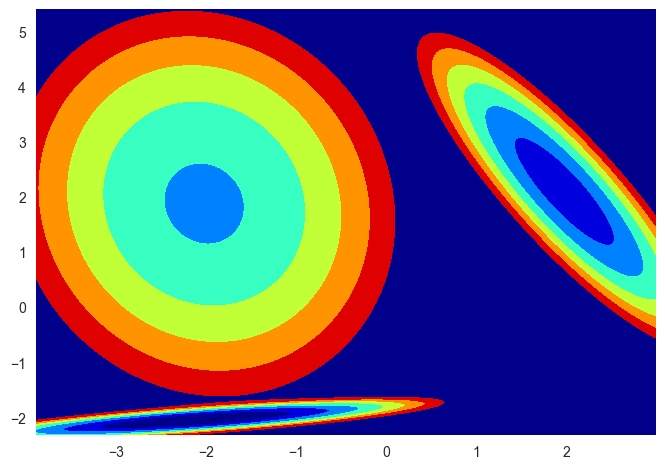

In [7]:
#Density estimation using GMM and heatmap

gmix = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmix.fit(D)
x = np.r_[D[:,0].min():D[:,0].max():500j]
y = np.r_[D[:,1].min():D[:,1].max():500j]
X, Y = np.meshgrid(x, y)
XX = np.c_[X.ravel(), Y.ravel()]
Z = -gmix.score_samples(XX)
Zt = Z.reshape(500,500)
plt.gca().patch.set_color('darkblue')
CS = plt.contourf( X,Y,Zt, levels= (1,2,3,4,5,6,7),cmap = "jet", aspect = "equal")
plt.grid(False)
plt.show()

/Users/itziar/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


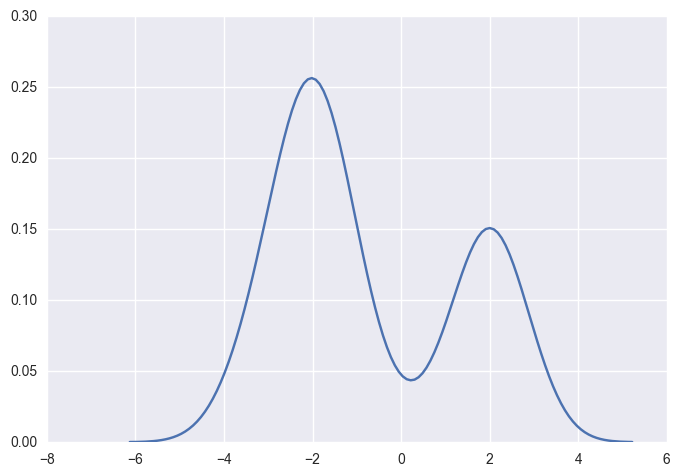

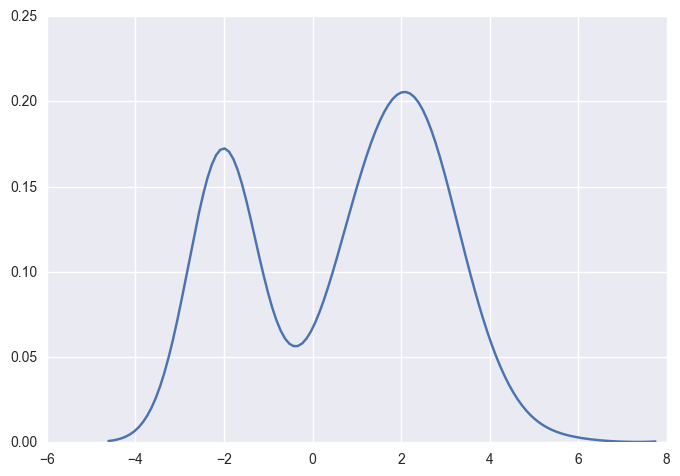

In [8]:
#Marginal distributions P(X) and P(Y) for KDE 
P_x = sns.distplot((D[:,0]), hist= False)
plt.show()
P_y = sns.distplot((D[:,1]), hist= False)
plt.show()